In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 한글 시각화를 위한 seaborn 폰트설정
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [3]:
aisles = pd.read_csv("aisles.csv")
dep = pd.read_csv("departments.csv")
prior = pd.read_csv("order_products__prior.csv")
train = pd.read_csv("order_products__train.csv")
order = pd.read_csv("orders.csv")
product = pd.read_csv("products.csv")
submission = pd.read_csv("sample_submission.csv")

In [4]:
# def reduce_mem_usage(train_data):
#     
# #  iterate through all the columns of a dataframe and modify the data type to reduce memory usage."""
#     start_mem = train_data.memory_usage().sum() / 1024**2
#     print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
# 
#     for col in train_data.columns:
#         col_type = train_data[col].dtype
# 
#         if col_type != object:
#             c_min = train_data[col].min()
#             c_max = train_data[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     train_data[col] = train_data[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     train_data[col] = train_data[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     train_data[col] = train_data[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     train_data[col] = train_data[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     train_data[col] = train_data[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     train_data[col] = train_data[col].astype(np.float32)
#                 else:
#                     train_data[col] = train_data[col].astype(np.float64)
#         else:
#             train_data[col] = train_data[col].astype('category')
#         end_mem = train_data.memory_usage().sum() / 1024**2
#         print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#         print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
# 
#     return train_data

In [5]:
# reduce_mem_usage(prior)
# reduce_mem_usage(train)
# reduce_mem_usage(product)
# reduce_mem_usage(order)
# reduce_mem_usage(dep)
# reduce_mem_usage(aisles)
# print('complete!')

In [6]:
print(len(prior) + len(train))
ot = pd.concat([prior, train])
ot = ot.sort_values(by='order_id').reset_index(drop=True)
ot

33819106


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,10246,3,0
2,1,49683,4,0
3,1,43633,5,1
4,1,13176,6,0
...,...,...,...,...
33819101,3421083,35211,5,0
33819102,3421083,39678,6,1
33819103,3421083,11352,7,0
33819104,3421083,4600,8,0


In [7]:
item_info = pd.merge(product, aisles, on ="aisle_id")
item_info

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes
...,...,...,...,...,...
49683,47769,Peas and Potatoe Roti Paratha,76,6,indian foods
49684,48292,Punjabi Chhole Chickpeas with Potatoes & Onions,76,6,indian foods
49685,48480,Punjab Eggplant,76,6,indian foods
49686,48830,Pav Bhaji Mashed Vegetable Curry,76,6,indian foods


In [8]:
item_info = pd.merge(item_info, dep, on="department_id")
item_info

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


In [9]:
df = pd.merge(item_info, ot, on="product_id")
print(df.shape)
df

(33819106, 9)


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,6695,7,1
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0
...,...,...,...,...,...,...,...,...,...
33819101,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3054471,19,1
33819102,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3136178,12,0
33819103,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3174062,10,0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3220368,16,0


In [10]:
df = pd.merge(df, order, on='order_id')
print(df.shape)
df

(33819106, 15)


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0,38259,prior,2,1,11,7.0
1,46149,Zero Calorie Cola,77,7,soft drinks,beverages,1107,6,0,38259,prior,2,1,11,7.0
2,9434,Bag of Large Lemons,34,1,frozen meat seafood,frozen,1107,2,0,38259,prior,2,1,11,7.0
3,769,Sliced American Cheese,21,16,packaged cheese,dairy eggs,1107,10,0,38259,prior,2,1,11,7.0
4,12078,Shredded Mexican Blend Cheese,21,16,packaged cheese,dairy eggs,1107,9,0,38259,prior,2,1,11,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,prior,30,3,10,1.0
33819102,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2733396,1,0,30511,prior,24,4,11,0.0
33819103,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,3152383,1,0,10113,train,12,3,19,13.0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,31522,1,1,31188,prior,3,3,11,4.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   aisle                   object 
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [12]:
top_product = df['product_name'].value_counts().head(10)
top_product

product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: count, dtype: int64

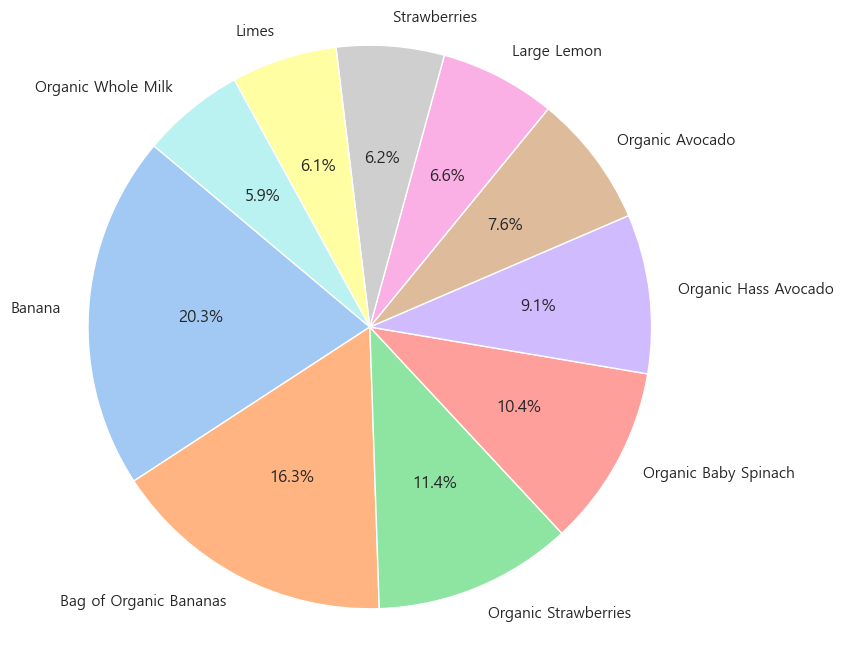

In [13]:
labels = top_product.index[:10]
sizes = top_product.values[:10]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.show()

1. 바나나 구매왕 찾기 이벤트!
a. 바나나 부자 : 제일 많은 바나나를 사신 분

In [14]:
banana_df = product[product['product_name'].str.contains('Banana')].reset_index(drop=True)
banana_df

,product_id,product_name,aisle_id,department_id
0,63,Banana & Sweet Potato Organic Teething Wafers,92,18
1,313,Peppermint/Banana Split Variety Pack Frozen Da...,37,1
2,426,2nd Foods Bananas,92,18
3,602,Banana Chocolate Chip,52,1
4,849,Blueberry & Banana Tiny Fruits Freeze Dried Sn...,92,18
...,...,...,...,...
371,49201,"Banana, Peach and Mango Fruit Pouch",92,18
372,49310,Oatmeal & Banana Baby Cereal,92,18
373,49337,Stage 2 Banana Sweet Pea Papaya Baby Food,92,18
374,49498,Beeswax & Banana Hand Creme,127,11


In [15]:
selected_products = ["Green Bananas", "Banana", "Bag of Organic Bananas", "Red Banana", "Baby Banana", "Baby Bananas", "Manzano Banana", "Organic Banana", "Bananas"]
banana_df2 = df[df['product_name'].isin(selected_products)]
banana_df2

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
11,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,1107,3,1,38259,prior,2,1,11,7.0
278,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,43669,1,1,199115,prior,20,1,18,26.0
473,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,82631,6,1,60380,prior,26,4,10,10.0
583,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,107716,2,1,80421,prior,8,0,14,18.0
606,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,108894,11,1,137274,prior,16,1,15,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33751178,39276,Bananas,24,4,fresh fruits,produce,3151988,1,1,152799,prior,55,0,12,2.0
33751179,39276,Bananas,24,4,fresh fruits,produce,3217685,1,1,193215,prior,17,3,18,10.0
33751180,39276,Bananas,24,4,fresh fruits,produce,3256309,1,1,193215,prior,7,0,15,3.0
33751181,39276,Bananas,24,4,fresh fruits,produce,3258045,1,1,11397,prior,33,1,16,10.0


In [16]:
banana_df3 = banana_df2['user_id'].value_counts().sort_values(ascending=False).head(30)
banana_df3

user_id
99707     98
124991    97
69919     97
178107    95
54804     93
189425    92
194931    92
74315     92
32971     91
120232    91
90110     89
41356     89
71049     89
64320     88
53673     86
105213    85
171132    85
9682      84
54594     84
174046    84
184451    84
132298    83
31087     83
47855     83
54485     83
67440     82
195804    82
27353     82
175540    82
126715    81
Name: count, dtype: int64

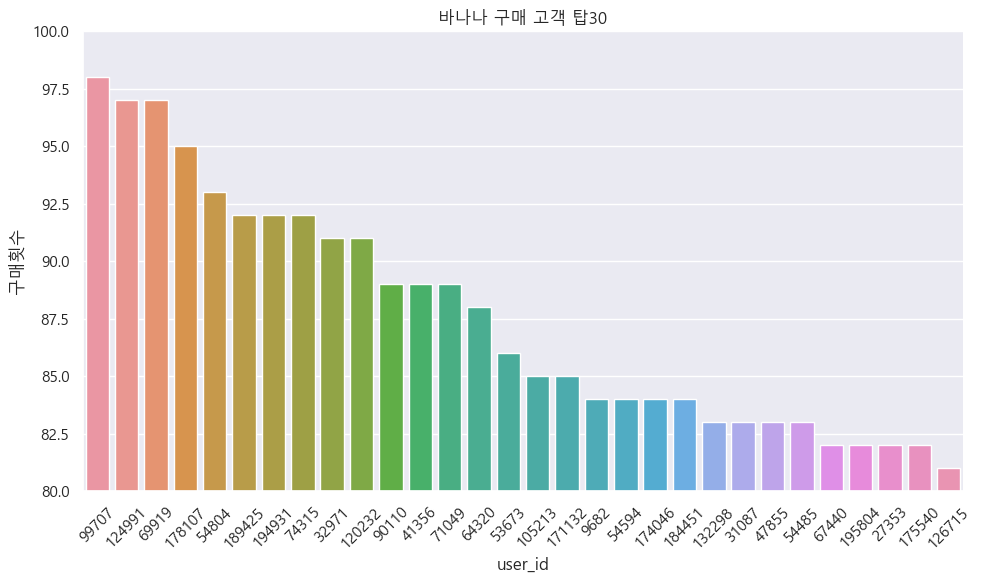

In [17]:
plt.figure(figsize=(10, 6))

sns.barplot(x=banana_df3.index.astype(str), y=banana_df3.values)
plt.title('바나나 구매 고객 탑30')
plt.xlabel('user_id')
plt.ylabel('구매횟수')
plt.ylim(80, 100)
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

b. 바나나 바라기 : 바나나를 제일 많이 사고 또 사신 분

In [18]:
banana_reorder = banana_df2.groupby('user_id')['reordered'].sum()
banana_reorder = banana_reorder_sorted = banana_reorder.sort_values(ascending=False)
banana_reorder

user_id
99707     97
69919     96
124991    95
178107    94
189425    91
          ..
171061     0
46903      0
90625      0
46915      0
134256     0
Name: reordered, Length: 124253, dtype: int64

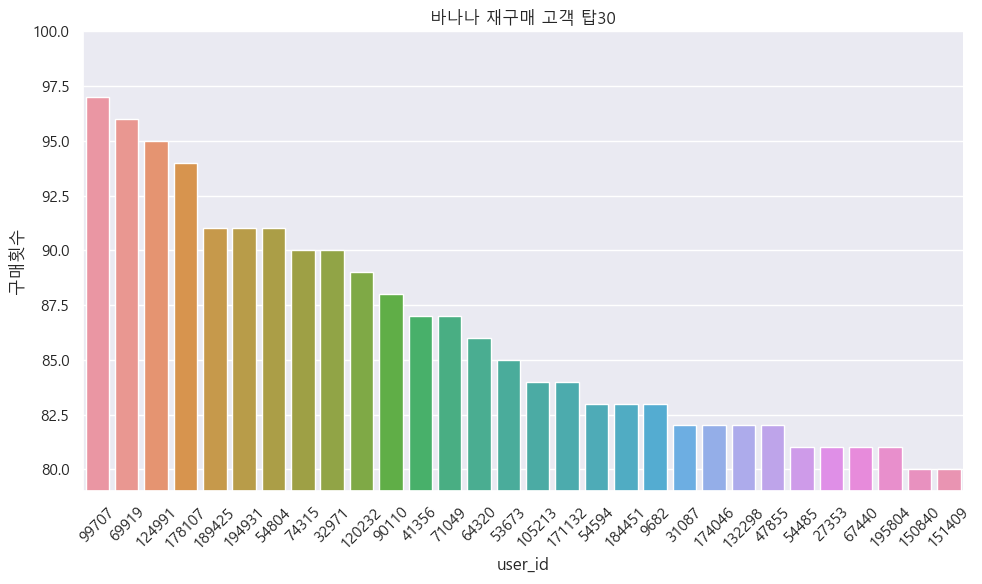

In [19]:
plt.figure(figsize=(10, 6))

sns.barplot(x=banana_reorder.index[:30].astype(str), y=banana_reorder.values[:30])
plt.title('바나나 재구매 고객 탑30')
plt.xlabel('user_id')
plt.ylabel('구매횟수')
plt.ylim(79, 100)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [20]:
# train확인
train_df = df[df['eval_set'] == 'train']
train_df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
24,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,6695,7,1,1540,train,29,1,1,8.0
25,40199,Chocolate Chip Cookies,61,19,cookies cakes,snacks,6695,17,1,1540,train,29,1,1,8.0
26,45051,Pub Mix,107,19,chips pretzels,snacks,6695,6,1,1540,train,29,1,1,8.0
27,10310,Wheat Thins Original,78,19,crackers,snacks,6695,20,1,1540,train,29,1,1,8.0
28,37600,Organic Kettle Corn,23,19,popcorn jerky,snacks,6695,1,1,1540,train,29,1,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33818973,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1656340,1,1,29207,train,17,0,10,10.0
33818995,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1875412,1,1,28831,train,94,5,13,0.0
33818998,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1892376,1,1,98935,train,31,1,10,26.0
33819057,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,3111299,1,1,198410,train,14,6,9,2.0


In [21]:
banana_train = train_df[train_df['product_name'].isin(selected_products)]
banana_train

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1189,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,253400,8,1,21054,train,4,3,14,30.0
2596,24852,Banana,24,4,fresh fruits,produce,468768,1,1,14910,train,61,5,11,7.0
4237,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,767323,3,1,2221,train,24,5,19,16.0
6011,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,1091681,2,1,184744,train,72,4,14,3.0
11287,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,2050666,3,0,193585,train,4,5,9,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33750192,37067,Organic Banana,24,4,fresh fruits,produce,2833920,1,1,78409,train,27,5,13,2.0
33751102,39276,Bananas,24,4,fresh fruits,produce,378812,2,0,194872,train,8,0,15,30.0
33751112,39276,Bananas,24,4,fresh fruits,produce,509455,1,1,108134,train,4,4,16,30.0
33751134,39276,Bananas,24,4,fresh fruits,produce,1618153,1,0,26935,train,52,1,6,4.0


In [22]:
banana_train['user_id'].nunique()
#train 확인 끝

36867

1 - 2. 유기농구매

In [23]:
organic_df = product[product['product_name'].str.contains('Organic')].reset_index(drop=True)
organic_df

,product_id,product_name,aisle_id,department_id
0,23,Organic Turkey Burgers,49,12
1,33,Organic Spaghetti Style Pasta,131,9
2,41,Organic Sourdough Einkorn Crackers Rosemary,78,19
3,43,Organic Clementines,123,4
4,47,Onion Flavor Organic Roasted Seaweed Snack,66,6
...,...,...,...,...
5030,49606,Organic Natural Red,28,5
5031,49608,Certified Organic Spanish Style Rice With Quin...,4,9
5032,49638,Organic Superfirm Vacuum Packed Tofu,14,20
5033,49653,Organic Aromatherapeutic Moroccan Argan Oil Set,25,11


In [24]:
organic_df['product_name'].values

array(['Organic Turkey Burgers', 'Organic Spaghetti Style Pasta',
       'Organic Sourdough Einkorn Crackers Rosemary', ...,
       'Organic Superfirm Vacuum Packed Tofu',
       'Organic Aromatherapeutic Moroccan Argan Oil Set',
       'Organic Creamed Coconut'], dtype=object)

In [25]:
organic_df2 = df[df['product_name'].isin(organic_df['product_name'].values)]
organic_df2

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,28413,Bunny-Luv Organic Carrots,83,4,fresh vegetables,produce,1107,13,0,38259,prior,2,1,11,7.0
11,13176,Bag of Organic Bananas,24,4,fresh fruits,produce,1107,3,1,38259,prior,2,1,11,7.0
28,37600,Organic Kettle Corn,23,19,popcorn jerky,snacks,6695,1,1,1540,train,29,1,1,8.0
33,12542,Organic Creamy Almond Butter,88,13,spreads,pantry,6695,8,1,1540,train,29,1,1,8.0
34,26317,Organic Lemonade,98,7,juice nectars,beverages,6695,11,1,1540,train,29,1,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819087,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,1257076,1,0,75662,prior,5,5,16,30.0
33819088,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,2263873,1,1,6871,prior,8,6,16,2.0
33819089,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,2398850,1,0,202404,prior,3,4,20,1.0
33819090,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,3072891,1,0,159218,prior,16,1,9,27.0


In [26]:
organic_df3 = organic_df2['user_id'].value_counts().sort_values(ascending=False).head(30)
organic_df3

user_id
182401    1428
175540    1359
38683     1339
84474     1327
88698     1317
160106    1305
115495    1296
175627    1293
73080     1291
143402    1253
195573    1245
190736    1200
108187    1193
66806     1177
105213    1166
132022    1157
1563      1152
106161    1151
145686    1141
1424      1136
121327    1122
103634    1108
142131    1107
89048     1102
74336     1099
3830      1095
205804    1092
36445     1090
37592     1088
176970    1076
Name: count, dtype: int64

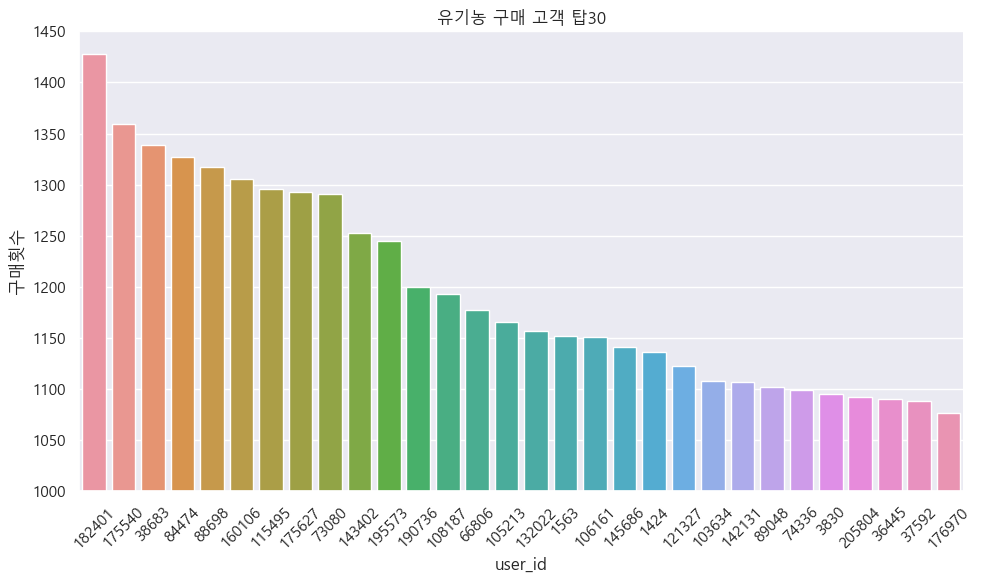

In [27]:
plt.figure(figsize=(10, 6))

sns.barplot(x=organic_df3.index.astype(str), y=organic_df3.values)
plt.title('유기농 구매 고객 탑30')
plt.xlabel('user_id')
plt.ylabel('구매횟수')
plt.ylim(1000, 1450)
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

5. 재구매집착증

In [28]:
product_reorder_counts = df.groupby('product_name')['reordered'].agg(['sum', 'count'])
product_reorder_counts.columns = ['reordered_count', 'total_count']

product_reorder_counts['reorder_ratio'] = product_reorder_counts['reordered_count'] / product_reorder_counts['total_count']

top_reorder_ratio = product_reorder_counts.sort_values(by='reorder_ratio', ascending=False).head(30)
top_reorder_ratio

,reordered_count,total_count,reorder_ratio
product_name,,,
Raw Veggie Wrappers,65,69,0.942029
Serenity Ultimate Extrema Overnight Pads,84,90,0.933333
Orange Energy Shots,12,13,0.923077
Chocolate Love Bar,94,102,0.921569
Soy Powder Infant Formula,32,35,0.914286
Simply Sleep Nighttime Sleep Aid,41,45,0.911111
"Energy Shot, Grape Flavor",20,22,0.909091
Russian River Valley Reserve Pinot Noir,27,30,0.900000
Bars Peanut Butter,62,69,0.898551


In [29]:
df[df['product_name'] == 'Raw Veggie Wrappers']

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4035444,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,1066363,6,0,9239,prior,2,1,11,4.0
4172049,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,406271,5,1,21777,prior,28,5,11,3.0
4175070,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,557046,1,1,21777,prior,13,0,8,3.0
4178496,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,745820,6,1,21777,prior,61,5,8,3.0
4183316,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,993399,1,1,21777,prior,19,6,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33778972,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,158445,1,1,21777,prior,88,3,13,10.0
33778973,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,376904,1,1,21777,prior,22,1,10,2.0
33778974,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,899999,1,1,21777,prior,77,1,11,3.0
33778975,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,999858,1,1,21777,prior,51,1,9,1.0


In [30]:
df_21777 = df[df['user_id'] == 21777]
df_21777

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4169004,10753,Peanut Butter Bar,3,19,energy granola bars,snacks,244525,7,1,21777,prior,36,0,23,6.0
4169005,18963,Apple Cider Vinegar,19,13,oils vinegars,pantry,244525,5,1,21777,prior,36,0,23,6.0
4169006,42671,Organic Brushing Rinse Peppermint,20,11,oral hygiene,personal care,244525,6,1,21777,prior,36,0,23,6.0
4169007,26259,Sound Sleep Vegetarian Liquid Phyto-Caps,47,11,vitamins supplements,personal care,244525,9,0,21777,prior,36,0,23,6.0
4169008,17953,Organic Hemp Rose Pure Castille Bar Soap,25,11,soap,personal care,244525,3,0,21777,prior,36,0,23,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33778972,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,158445,1,1,21777,prior,88,3,13,10.0
33778973,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,376904,1,1,21777,prior,22,1,10,2.0
33778974,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,899999,1,1,21777,prior,77,1,11,3.0
33778975,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,999858,1,1,21777,prior,51,1,9,1.0


In [31]:
product_21777 = df_21777['product_name'].value_counts()
product_21777

product_name
Raw Veggie Wrappers                                 65
Dark Roast Cold Brew Coffee Concentrate             32
Pure Coconut Milk                                   24
Organic Premium Roasted Seaweed Snack               21
Lightly Salted Toasted Coconut Chips                12
                                                    ..
Dark Roast Coffee                                    1
Banana Bites, Chewy, Organic Coconut                 1
Sun Cups Dark Chocolate                              1
Salted Caramel Organic Dark Chocolate, 57% Cocoa     1
Yuba Tofu Skin                                       1
Name: count, Length: 116, dtype: int64

In [32]:
category_21777 = df_21777['department'].value_counts()
category_21777

department
snacks             89
deli               80
international      54
beverages          43
personal care      31
pantry             28
produce            20
dairy eggs         14
household          13
babies             12
pets                9
breakfast           9
dry goods pasta     5
bakery              1
Name: count, dtype: int64

In [33]:
product_reorder_counts = df.groupby('product_name')['reordered'].agg(['sum', 'count'])
product_reorder_counts.columns = ['reordered_count', 'total_count']

product_reorder_counts['reorder_ratio'] = product_reorder_counts['reordered_count'] / product_reorder_counts['total_count']

top_reorder_ratio = product_reorder_counts.sort_values(by='reorder_ratio', ascending=False)
filtered_top_reorder_ratio = top_reorder_ratio[top_reorder_ratio['total_count'] >= 1000]
filtered_top_reorder_ratio

,reordered_count,total_count,reorder_ratio
product_name,,,
Half And Half Ultra Pasteurized,2580,2995,0.861436
Whole Organic Omega 3 Milk,8091,9410,0.859830
Organic Lactose Free Whole Milk,7511,8742,0.859186
Organic Homogenized Whole Milk,3514,4095,0.858120
Ultra-Purified Water,1306,1524,0.856955
...,...,...,...
Corn Starch,140,1921,0.072879
Cayenne Pepper,112,1755,0.063818
Ground Ginger,105,1785,0.058824


In [34]:
h_h = df[df['product_name'] == 'Half And Half Ultra Pasteurized']
h_h

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
36284,9292,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,1638299,4,1,29952,prior,26,4,15,8.0
53422,9292,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,172872,3,1,102332,prior,21,2,16,13.0
53816,9292,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,1441784,1,1,102332,prior,24,4,10,14.0
59817,9292,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,1971241,10,1,2538,prior,6,5,15,23.0
60011,9292,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,2384959,15,1,2538,prior,7,4,11,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32656640,9292,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,3356216,1,1,181856,prior,2,3,8,8.0
32656641,9292,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,3362091,1,1,71847,prior,6,2,10,6.0
32656644,9292,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,3366327,2,1,80509,prior,7,4,14,6.0
32656646,9292,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs,3395969,1,1,194567,prior,64,3,9,2.0


In [35]:
h_h['user_id'].value_counts()

user_id
144977    77
122725    73
194567    58
145961    53
198506    51
          ..
105768     1
123401     1
111119     1
31254      1
203494     1
Name: count, Length: 415, dtype: int64